In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/R04_25")
# dataset = pd.read_csv("./R04_25")


In [7]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [8]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-5.0,2.0,37.0,39.0,30.0,26.0,-16.0,-14.0,4.0,18.0,...,-8.0,-35.0,-45.0,-66.0,-39.0,-33.0,-48.0,-39.0,-39.0,0
1,-12.0,-24.0,1.0,-2.0,-15.0,-22.0,-55.0,-36.0,-27.0,-25.0,...,-40.0,-68.0,-65.0,-84.0,-52.0,-21.0,-42.0,-31.0,-34.0,0
2,-77.0,-78.0,-59.0,-65.0,-63.0,-55.0,-67.0,-88.0,-71.0,-65.0,...,-22.0,-50.0,-35.0,-48.0,-18.0,-20.0,-42.0,-29.0,-27.0,0
3,-66.0,-67.0,-50.0,-65.0,-60.0,-55.0,-68.0,-62.0,-53.0,-54.0,...,-60.0,-78.0,-64.0,-68.0,-41.0,-44.0,-62.0,-34.0,-43.0,0
4,-45.0,-55.0,-33.0,-53.0,-54.0,-63.0,-83.0,-52.0,-50.0,-53.0,...,-55.0,-70.0,-54.0,-63.0,-37.0,-60.0,-70.0,-34.0,-45.0,0


In [9]:
data = dataset.iloc[: ,:16]
data['label'] = dataset['label']

In [10]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,Cz..,C2..,C4..,C6..,Cp5.,Cp3.,label
0,-5.0,2.0,37.0,39.0,30.0,26.0,-16.0,-14.0,4.0,18.0,18.0,17.0,-8.0,-40.0,-13.0,-8.0,0
1,-12.0,-24.0,1.0,-2.0,-15.0,-22.0,-55.0,-36.0,-27.0,-25.0,-26.0,-33.0,-49.0,-73.0,-42.0,-50.0,0
2,-77.0,-78.0,-59.0,-65.0,-63.0,-55.0,-67.0,-88.0,-71.0,-65.0,-66.0,-56.0,-61.0,-68.0,-70.0,-72.0,0
3,-66.0,-67.0,-50.0,-65.0,-60.0,-55.0,-68.0,-62.0,-53.0,-54.0,-61.0,-45.0,-60.0,-69.0,-50.0,-54.0,0
4,-45.0,-55.0,-33.0,-53.0,-54.0,-63.0,-83.0,-52.0,-50.0,-53.0,-65.0,-59.0,-76.0,-82.0,-56.0,-58.0,0


In [11]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [12]:
train_accuracies = []

In [13]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128,kernel_size=1,activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [15]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)
    train_accuracies.append(history.history['accuracy'][0])



epoch 1/100
12330/12330 [==============================] - 60s 5ms/step - loss: 1.0021 - accuracy: 0.5200
epoch 2/100
12330/12330 [==============================] - 58s 5ms/step - loss: 0.9303 - accuracy: 0.5637
epoch 3/100
12330/12330 [==============================] - 60s 5ms/step - loss: 0.8870 - accuracy: 0.5864
epoch 4/100
12330/12330 [==============================] - 63s 5ms/step - loss: 0.8583 - accuracy: 0.6013
epoch 5/100
12330/12330 [==============================] - 58s 5ms/step - loss: 0.8371 - accuracy: 0.6123
epoch 6/100
12330/12330 [==============================] - 58s 5ms/step - loss: 0.8205 - accuracy: 0.6209
epoch 7/100
12330/12330 [==============================] - 58s 5ms/step - loss: 0.8073 - accuracy: 0.6287
epoch 8/100
12330/12330 [==============================] - 59s 5ms/step - loss: 0.7962 - accuracy: 0.6340
epoch 9/100
12330/12330 [==============================] - 58s 5ms/step - loss: 0.7866 - accuracy: 0.6391
epoch 10/100
12330/12330 [====================

In [16]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.7959
Test Accuracy: 0.6598


In [17]:
print(train_accuracies)

[0.5200197696685791, 0.5636506676673889, 0.5863848328590393, 0.6013356447219849, 0.6122719049453735, 0.6208916306495667, 0.6286673545837402, 0.6340379118919373, 0.6391144394874573, 0.6431189179420471, 0.6468040347099304, 0.6501951813697815, 0.6532897353172302, 0.6560396552085876, 0.6580291986465454, 0.6602494120597839, 0.6623073816299438, 0.6638914346694946, 0.6650217771530151, 0.667125403881073, 0.6684027910232544, 0.6696193218231201, 0.6712870001792908, 0.6719079613685608, 0.6732664108276367, 0.6743841171264648, 0.6750101447105408, 0.6761025190353394, 0.676680326461792, 0.6776688098907471, 0.6792122721672058, 0.6794099807739258, 0.6796330213546753, 0.6803832054138184, 0.6818658709526062, 0.6818481087684631, 0.6822662949562073, 0.6833536028862, 0.6833384037017822, 0.6838681101799011, 0.684899628162384, 0.6850137114524841, 0.6855003237724304, 0.6849959492683411, 0.6861339211463928, 0.6865140795707703, 0.6871375441551208, 0.686998188495636, 0.6877002120018005, 0.6886354684829712, 0.6885

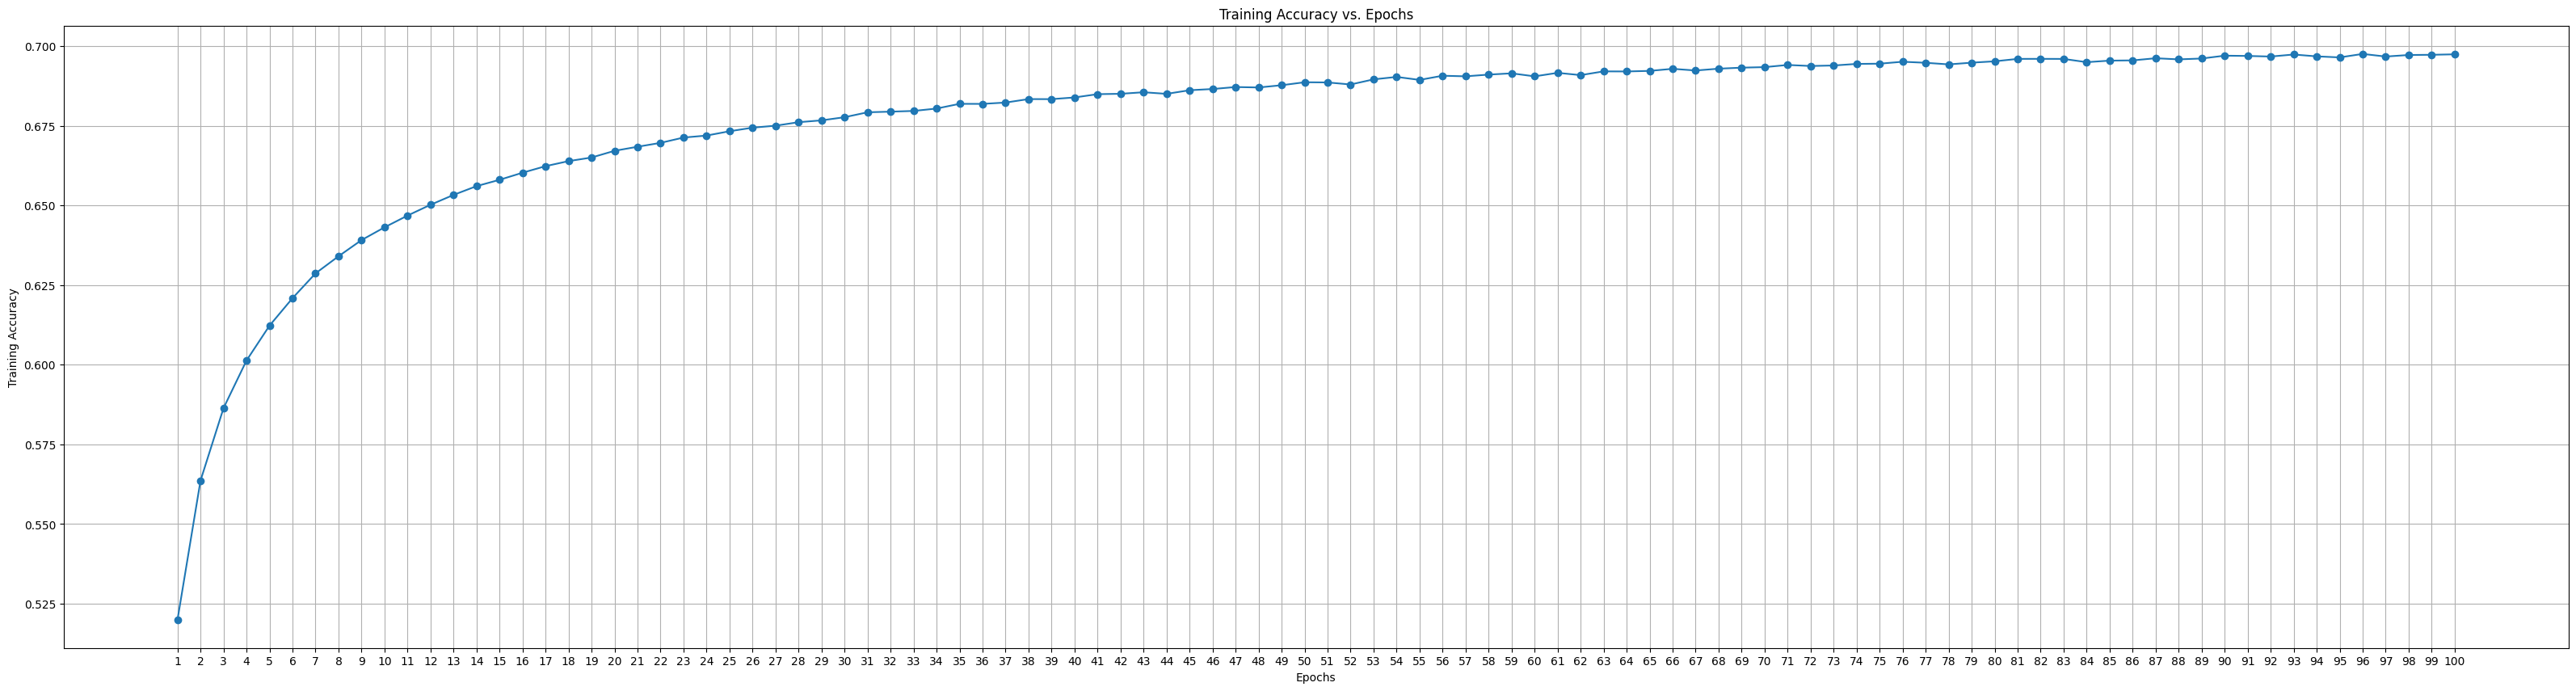

In [18]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [19]:
print(sum(train_accuracies))

67.74234348535538


In [20]:
print(max(train_accuracies))

0.697523832321167
